**Atualizando a biblioteca para plotagem de gráficos**


In [1]:
!pip -q install plotly --upgrade

**Importando bibliotecas**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [5]:
base = pd.read_csv('weather.nominal.txt', sep=',')

In [6]:
base

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [7]:
np.unique(base['play'], return_counts=True)

(array(['no', 'yes'], dtype=object), array([5, 9], dtype=int64))

C:\Users\lmoxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lmoxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lmoxa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

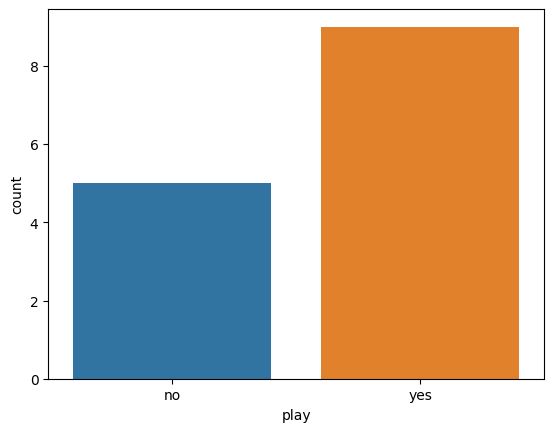

In [8]:
sns.countplot(x = base['play']);

**Separando os atributos de entrada e de classe**

In [9]:
X_prev = base.iloc[:, 0:4].values

In [10]:
X_prev

array([['sunny', 'hot', 'high', False],
       ['sunny', 'hot', 'high', True],
       ['overcast', 'hot', 'high', False],
       ['rainy', 'mild', 'high', False],
       ['rainy', 'cool', 'normal', False],
       ['rainy', 'cool', 'normal', True],
       ['overcast', 'cool', 'normal', True],
       ['sunny', 'mild', 'high', False],
       ['sunny', 'cool', 'normal', False],
       ['rainy', 'mild', 'normal', False],
       ['sunny', 'mild', 'normal', True],
       ['overcast', 'mild', 'high', True],
       ['overcast', 'hot', 'normal', False],
       ['rainy', 'mild', 'high', True]], dtype=object)

In [11]:
y_classe = base.iloc[:, 4].values

In [12]:
y_classe

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

**Tratamento de dados categóricos**

In [14]:
base = pd.get_dummies(base, columns=['outlook', 'temperature', 'humidity', 'windy', 'play'])
base.head()

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True,play_no,play_yes
0,False,False,True,False,True,False,True,False,True,False,True,False
1,False,False,True,False,True,False,True,False,False,True,True,False
2,True,False,False,False,True,False,True,False,True,False,False,True
3,False,True,False,False,False,True,True,False,True,False,False,True
4,False,True,False,True,False,False,False,True,True,False,False,True


**Método de amostragem Holdout**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_prev

array([['sunny', 'hot', 'high', False],
       ['sunny', 'hot', 'high', True],
       ['overcast', 'hot', 'high', False],
       ['rainy', 'mild', 'high', False],
       ['rainy', 'cool', 'normal', False],
       ['rainy', 'cool', 'normal', True],
       ['overcast', 'cool', 'normal', True],
       ['sunny', 'mild', 'high', False],
       ['sunny', 'cool', 'normal', False],
       ['rainy', 'mild', 'normal', False],
       ['sunny', 'mild', 'normal', True],
       ['overcast', 'mild', 'high', True],
       ['overcast', 'hot', 'normal', False],
       ['rainy', 'mild', 'high', True]], dtype=object)

In [17]:
y_classe

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [18]:
y_classe.shape

(14,)

In [19]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [20]:
X_treino.shape

(11, 4)

In [21]:
X_teste.shape

(3, 4)

In [22]:
y_treino

array(['yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes',
       'yes'], dtype=object)

In [23]:
y_teste

array(['yes', 'yes', 'no'], dtype=object)

In [24]:
import pickle

In [25]:
with open('wheaterNominal.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)